In [3]:
import pandas as pd

pd.read_csv('statistic.csv', index_col=0).to_csv('/home/prokofev.a@agtu.ru/Загрузки/qgis temp/Обучение моделей/dataset/statistic.csv')

In [18]:
import numpy as np

data = np.random.rand(1000000) * 14801
#print(data)
true_std = data.std()
true_mean = data.mean()

n = 0
mean = 0.0
M2 = 0.0  # сумма квадратов отклонений от текущего среднего

for x in data:  # поток данных
    n += 1
    delta = x - mean
    mean += delta / n
    M2 += delta * (x - mean)

if n < 2:
    print( float('nan'))
else:
    std = (M2 / (n)) ** 0.5
delta_std = std - true_std
delta_mean = mean - true_mean
print(delta_std * 2500)
print(delta_mean *2500)

-1.5916157281026244e-07
-2.0691004465334117e-07


In [6]:
from os import listdir
len([i for i in listdir('/home/prokofev.a@agtu.ru/Загрузки/qgis temp/Обучение моделей/dataset/')])

2482

In [4]:
import bcrypt
password_hash = bcrypt.hashpw(input().encode('utf-8'), bcrypt.gensalt()).decode('utf-8')
print(password_hash)

$2b$12$EBQzWmSJO.BLJ72Gu.04zeap6d2oTTdHNmAuUnJtSaXMUZutRDe7y


In [2]:
from jupyter_server.auth import passwd
passwd()

'argon2:$argon2id$v=19$m=10240,t=10,p=8$i1n456LP+PAc/pJnzYJswQ$FP2FDdVbcGcpJtvEJtD7O/7g5QNCTgi+eQRxwhO1plY'

In [9]:
import random
random.choice([0,1])

1

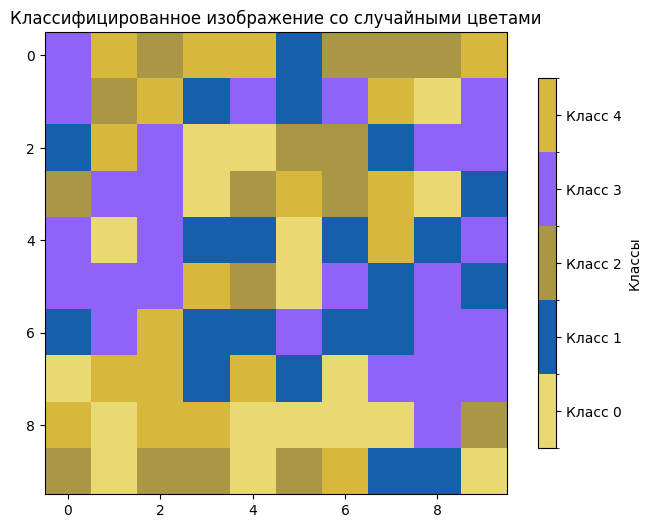

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Параметры
n_classes = 5  # Количество классов
image_shape = (10, 10)  # Размер изображения

# 1. Генерация случайного классифицированного изображения
np.random.seed(42)
classified_image = np.random.randint(0, n_classes, size=image_shape)

# 2. Генерация случайных цветов для каждого класса
class_colors = {
    i: mcolors.to_hex(np.random.rand(3))  # Генерируем случайный цвет в HEX
    for i in range(n_classes)
}

# 3. Создаем цветовую карту (colormap)
cmap = mcolors.ListedColormap([class_colors[i] for i in range(n_classes)])
bounds = np.arange(n_classes + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 4. Визуализация
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(classified_image, cmap=cmap, norm=norm)

# 5. Добавляем colorbar с названиями классов
cbar = plt.colorbar(
    im,
    ax=ax,
    ticks=np.arange(n_classes),
    spacing="uniform",
    shrink=0.8,
)
cbar.set_label("Классы")
cbar.ax.set_yticklabels([f"Класс {i}" for i in range(n_classes)])

plt.title("Классифицированное изображение со случайными цветами")
plt.show()

In [33]:
import torch
import segmentation_models_pytorch as smp

def pack(a, b):
    tensors1 = []
    tensors2 = []
    un = torch.cat([a, b]).unique().tolist()
    for i in un:
        tensors1.append(a == i)
        tensors1.append(b == i)
    return torch.stack(tensors1), torch.stack(tensors1), len(un)

y_true = torch.tensor([[[[0,1,2], [3, 3, 3], [2, 1, 0]]]*9]*4)
y_pred = torch.tensor([[[[0,1,2], [3, 2, 3], [2, 1, 0]]]*9]*4)
#y_pred, num_classes = pack(y_true, y_pred)

tp, fp, fn, tn = smp.metrics.get_stats(y_pred, y_true, mode='multiclass', num_classes=4)

In [34]:
y_true.shape

torch.Size([4, 9, 3, 3])

In [35]:
smp.metrics.iou_score(tp, fp, fn, tn)

tensor([[1.0000, 1.0000, 0.6667, 0.6667],
        [1.0000, 1.0000, 0.6667, 0.6667],
        [1.0000, 1.0000, 0.6667, 0.6667],
        [1.0000, 1.0000, 0.6667, 0.6667]])

In [79]:
import torch
import segmentation_models_pytorch as smp

# Пример данных (batch_size=1, num_classes=3, height=256, width=256)
output = torch.randint(0, 3, (1, 256, 256))  # логиты модели
target = torch.randint(0, 3, (1, 256, 256))  # ground truth (классы 0, 1, 2)

# Применяем softmax для многоклассовой сегментации
#output_softmax = torch.softmax(output, dim=1)

# Получаем статистики (TP, FP, FN, TN) для каждого класса
stats = smp.metrics.get_stats(
    output,
    target,
    mode="multiclass",
    num_classes=3,
)

print(stats)

(tensor([[7392, 7251, 7370]]), tensor([[14578, 14543, 14402]]), tensor([[14373, 14434, 14716]]), tensor([[29193, 29308, 29048]]))
